![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [68]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [69]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [70]:
penguins_df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [71]:
penguins_df.values

array([[39.1, 18.7, 181.0, 3750.0, 'MALE'],
       [39.5, 17.4, 186.0, 3800.0, 'FEMALE'],
       [40.3, 18.0, 195.0, 3250.0, 'FEMALE'],
       ...,
       [50.4, 15.7, 222.0, 5750.0, 'MALE'],
       [45.2, 14.8, 212.0, 5200.0, 'FEMALE'],
       [49.9, 16.1, 213.0, 5400.0, 'MALE']], dtype=object)

In [72]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [73]:
penguins_df.iloc[0:5]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [74]:
penguins_df.iloc[0:5, 0:4]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [75]:
penguins_df.isna().sum().sort_values()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [76]:
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0              39.1             18.7              181.0       3750.0         1
1              39.5             17.4              186.0       3800.0         0
2              40.3             18.0              195.0       3250.0         0
3              36.7             19.3              193.0       3450.0         0
4              39.3             20.6              190.0       3650.0         1


In [77]:
scaler = StandardScaler()
scaled_penguins_df = scaler.fit_transform(penguins_df)
print(scaled_penguins_df)

[[-0.90390586  0.79035987 -1.42534179 -0.56694801  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985  0.99399394]]


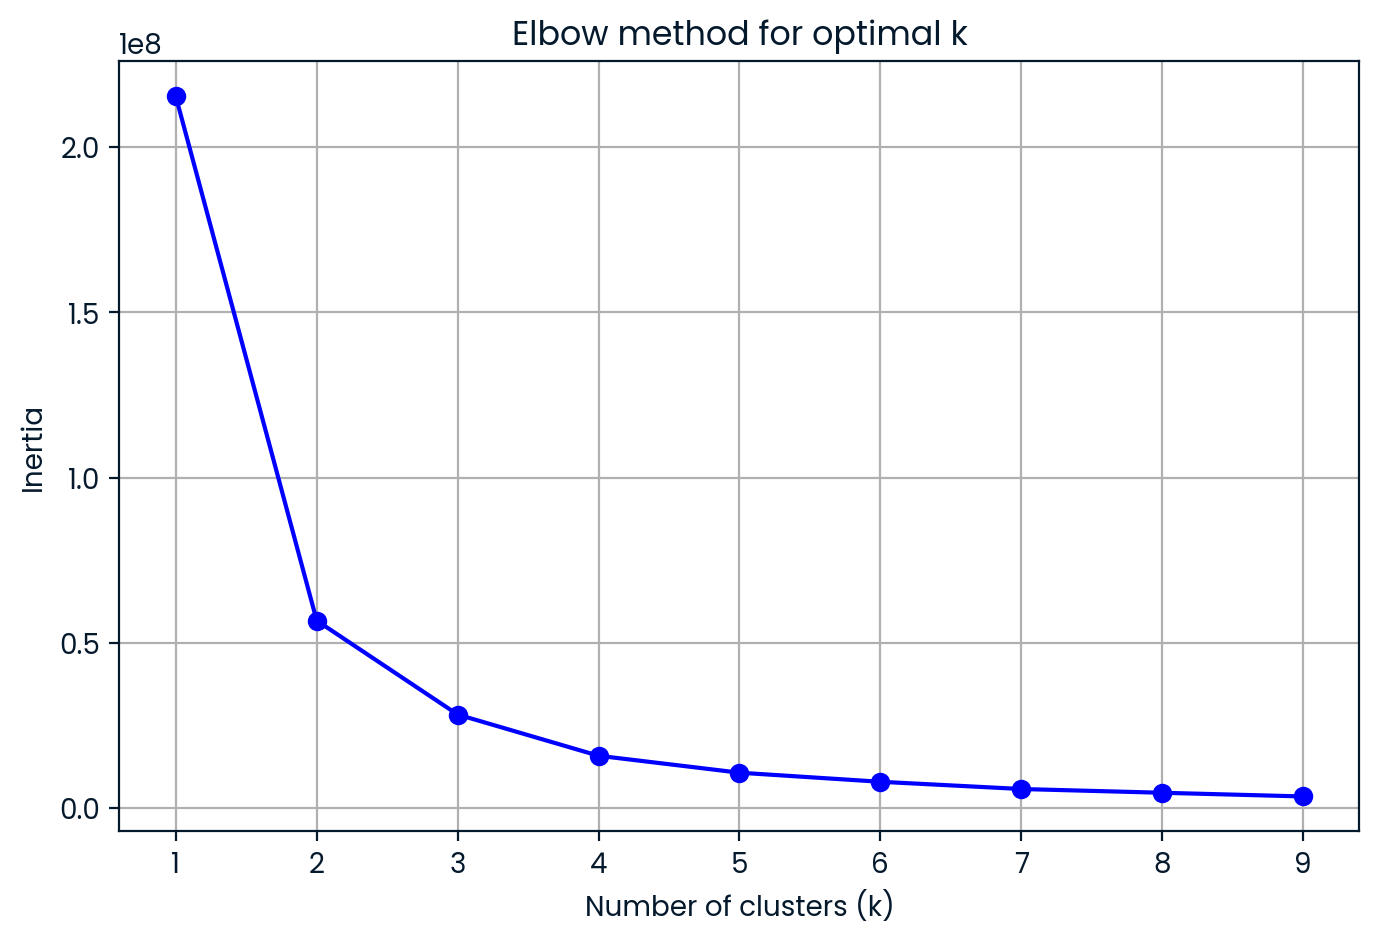

In [78]:
inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_df)
    inertia_values.append(kmeans.inertia_)
    #print(len(inertia_values))
    #print(inertia_values)
plt.figure(figsize = (8, 5))
plt.plot(range(1, 10), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal k')
plt.grid(True)
plt.show()
    
    


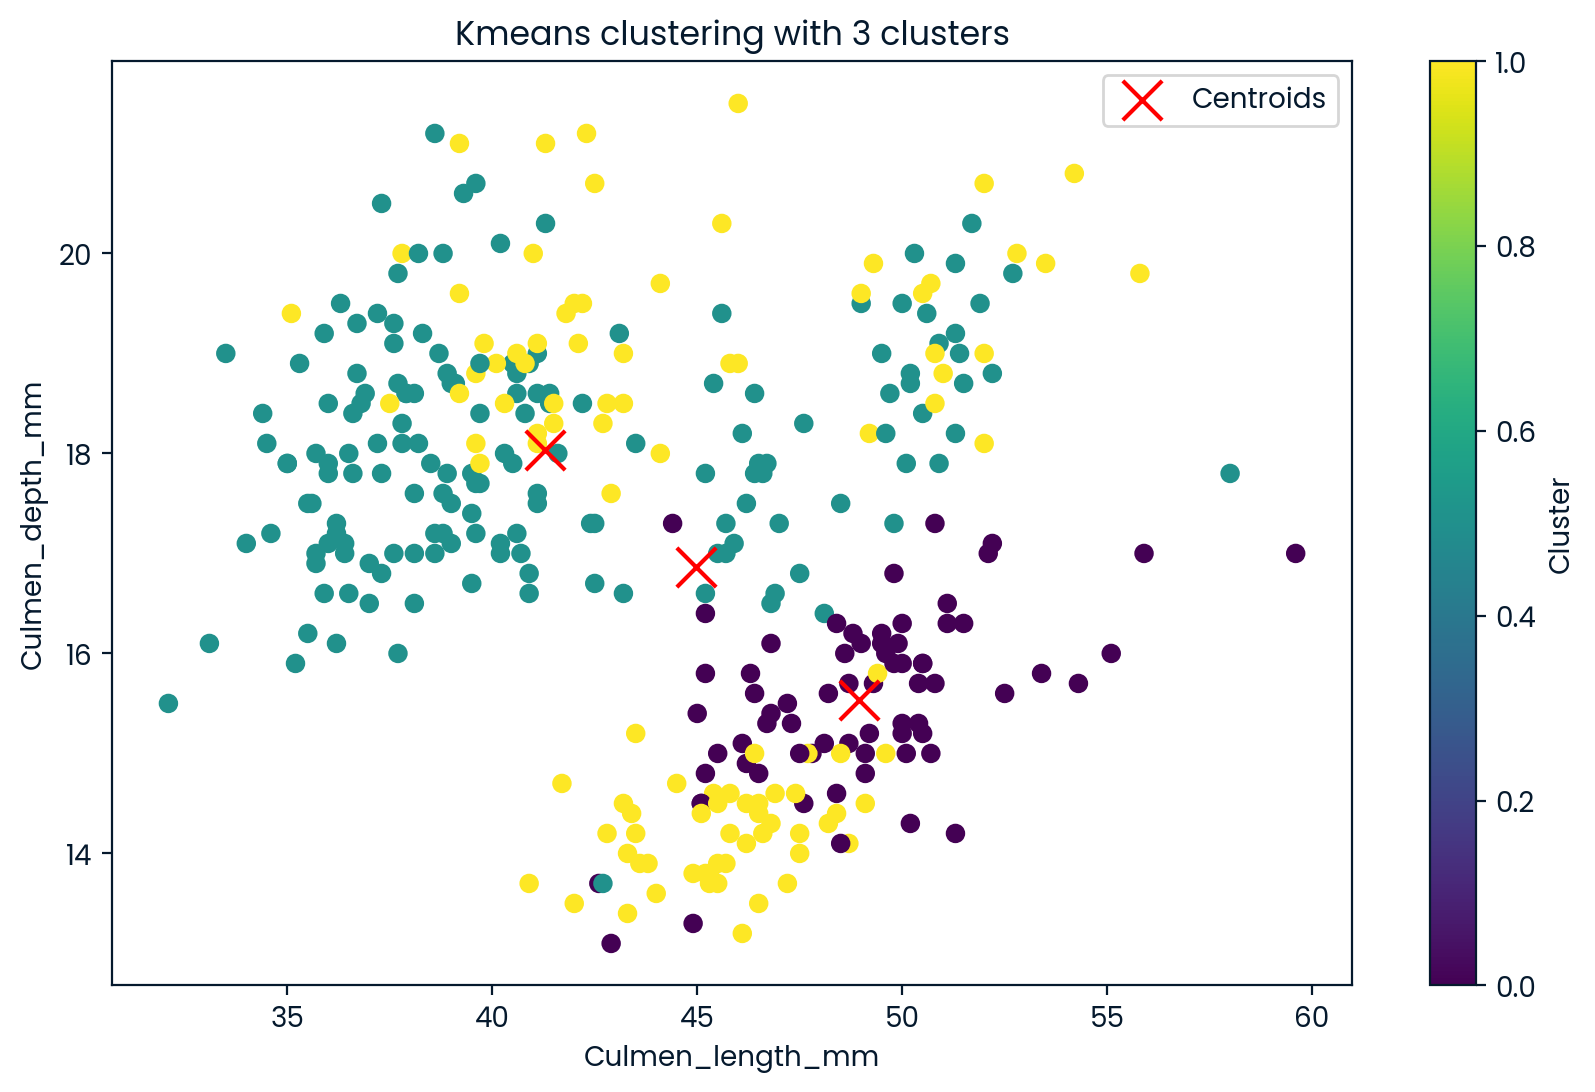

In [79]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(penguins_df)
penguins_df['label'] = kmeans.labels_
plt.figure(figsize = (10, 6))
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'],  c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker='x', label='Centroids')
plt.legend()
plt.xlabel('Culmen_length_mm')
plt.ylabel('Culmen_depth_mm')
plt.title('Kmeans clustering with 3 clusters')
plt.colorbar(label='Cluster')
plt.show()

In [80]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_df['label']=kmeans.labels_
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean().reset_index()
print(stat_penguins)

   label  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0      0         48.935714        15.531429         220.614286  5435.357143
1      1         41.286335        18.037267         190.086957  3522.049689
2      2         44.974257        16.867327         204.722772  4445.792079
